In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif,chi2
%matplotlib inline

In [3]:
df = pd.read_csv('insurance.csv')
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.groupby(['sex']).count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [30]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
freq_table = df.groupby(['sex']).size().reset_index(name='Count')
freq_table

,sex,Count
0,female,662
1,male,676


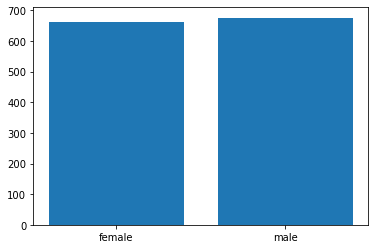

In [15]:
plt.bar(freq_table['sex'], freq_table['Count'])
plt.show()

Text(0.5, 1.0, 'Age Distribution ')

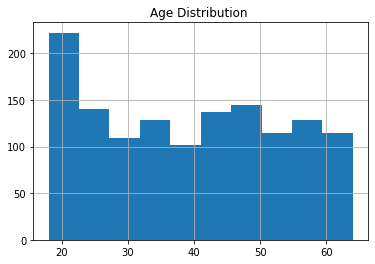

In [19]:
df['age'].hist()
plt.title("Age Distribution ")



The age bracket  between 20-25 are higher in the distribution 

In [36]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [42]:
numerical_discrete=df['children'].reset_index(name='children')
numerical_discrete

,index,children
0,0,0
1,1,1
2,2,3
3,3,0
4,4,0
...,...,...
1333,1333,3
1334,1334,0
1335,1335,0
1336,1336,0


In [67]:
numerical_continuous=df.loc[: ,['age', 'bmi']]
numerical_continuous

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


Text(0, 0.5, 'count')

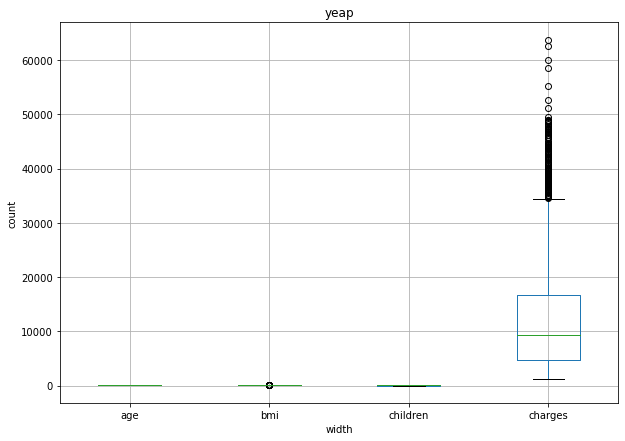

In [68]:
plt.figure(figsize = (10,7))
df.boxplot()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')

In [71]:
upper_limit =df['bmi'].mean() + 3*df['bmi'].std()
upper_limit

48.95795759602359

In [76]:
df_no_outlier=df[df['bmi']>upper_limit]
df_no_outlier

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [78]:
categorical=df.loc[: ,['sex', 'region']]  
categorical

,sex,region
0,female,southwest
1,male,southeast
2,male,southeast
3,male,northwest
4,male,northwest
...,...,...
1333,male,northwest
1334,female,northeast
1335,female,southeast
1336,female,southwest


In [79]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
sexcat=pd.get_dummies(df.sex)
sexcat

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [14]:
regioncat=pd.get_dummies(df.region)
regioncat

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [24]:
smoketcat=pd.get_dummies(df.smoker)
smoketcat

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [25]:
df=pd.concat([df,smoketcat],axis='columns')
df

,age,bmi,children,smoker,charges,female,male,northwest,southeast,southwest,no,yes
0,19,27.900,0,yes,16884.92400,1,0,0,0,1,0,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0,1,0
3,33,22.705,0,no,21984.47061,0,1,1,0,0,1,0
4,32,28.880,0,no,3866.85520,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,1,0,0,1,0
1334,18,31.920,0,no,2205.98080,1,0,0,0,0,1,0
1335,18,36.850,0,no,1629.83350,1,0,0,1,0,1,0
1336,21,25.800,0,no,2007.94500,1,0,0,0,1,1,0


In [15]:
df=pd.concat([df,sexcat],axis='columns')
df

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [16]:
df=pd.concat([df,regioncat],axis='columns')
df

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,0,0,0,1


In [17]:
df.drop(['sex','region','northeast'],axis = 1, inplace = True)
df

,age,bmi,children,smoker,charges,female,male,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,1,0,0,0,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0
3,33,22.705,0,no,21984.47061,0,1,1,0,0
4,32,28.880,0,no,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,1,0,0
1334,18,31.920,0,no,2205.98080,1,0,0,0,0
1335,18,36.850,0,no,1629.83350,1,0,0,1,0
1336,21,25.800,0,no,2007.94500,1,0,0,0,1


In [ ]:
df.drop(['smoker'],axis = 1, inplace = True)
df

In [33]:
X_train, y_train = df.drop("charges", axis=1), df.charges

In [37]:
X_train

,age,bmi,children,female,male,northwest,southeast,southwest,no,yes
0,19,27.900,0,1,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0
4,32,28.880,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0
1334,18,31.920,0,1,0,0,0,0,1,0
1335,18,36.850,0,1,0,0,1,0,1,0
1336,21,25.800,0,1,0,0,0,1,1,0


In [19]:
y_train

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [38]:
bestfeatures=df.corr()

In [39]:
top_corr_features=bestfeatures.index
top_corr_features


Index(['age', 'bmi', 'children', 'charges', 'female', 'male', 'northwest',
       'southeast', 'southwest', 'no', 'yes'],
      dtype='object')

In [40]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

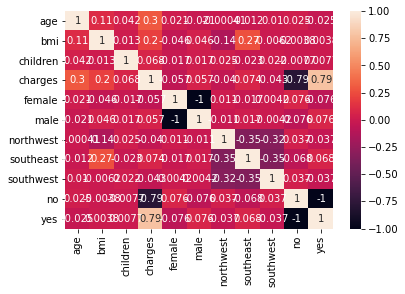

In [43]:
g=sns.heatmap(df[top_corr_features].corr(),annot=True)